<img src="images/header_image.png"
     style="float: left; width: 400px;"/>

# CZ1015 Introduction to Data Science and Artifical Intelligence Mini Project
## World Happiness Report 
A program coded in Python that analysis World Happiness using the World Happiness Report produced by United Nations Sustainable Development Solutions Network in partnership with the Ernesto Illy Foundation. It contains analysis of happiness of different countries with respect to various factors and a Singapore specific analysis as well. 

Made by **GUPTA JAY, NGUYEN DUY KHANH, TIEU PHAT DAT**  
CZ1015 Introduction to Data Science and Artifical Intelligence  
School of Computer Science and Engineering  
Nanyang Technological University  

### Prerequisites
What things you need to run the program

* CZ1015 Mini Project.ipnyb
* Pandas, Seaborn, Numpy, Matplotlib, Sklearn, Graphviz and Plotly python libraries
* data.xls (Source: http://worldhappiness.report/ed/2019/)
* factor_of_happiness2018.csv (Source: http://worldhappiness.report/ed/2018/)
* factor_of_happiness2018(2).csv (Source: http://worldhappiness.report/ed/2018/)

# Problem Statement(s) 
### 1. What are the top factors which affect happiness? Are there any wrong perceived factors about happiness?
### 2. Create your own Country and Predict it’s Happiness Score and the most similar Country
### 3. Economic Analysis of Singapore over the Years

# Basic Statistics

In [44]:
# Importing all the project pre-requisites
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Import essential models and functions from plotly
import plotly
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

### Import the Dataset
---
Vital statistics of the dataset using the `type` and `shape` attributes

In [45]:
data1=pd.read_csv("data/factor_of_happiness2018.csv")
data2=pd.read_csv("data/factor_of_happiness2018(2).csv")

print("Data type : ", type(data2))
print("Data dims : ", data2.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (156, 15)


In [46]:
# Get the overview of the data
data2.head()

,country,Region indicator,"Life ladder, 2015-2017","Standard error, life ladder, 2015-2017","Log of GDP per person, 2015-2017","GDP per person, 2015-2017","Healthy life expectancy, 2015-2017","Social support, 2015-2017","Standard error, social support, 2015-2017","Freedom to make life choices, 2015-2017","Standard error, freedom to make life choices, 2015-2017","Generosity, 2015-2017, without adjustment for GDP per person","Standard error, generosity, 2015-2017","Perceptions of corruption, 2015-2017","Standard error, perceptions of corruption, 2015-2017"
0,Afghanistan,South Asia,3.631519,0.042360,7.462610,1741.687500,52.013329,0.525075,0.011119,0.445294,0.011449,0.179054,0.008331,0.879705,0.006009
1,Albania,Central and Eastern Europe,4.586040,0.055813,9.338126,11363.095700,68.871552,0.639576,0.010078,0.726340,0.009421,0.259975,0.009048,0.886778,0.005775
2,Algeria,Middle East and North Africa,5.294638,0.057087,9.540703,13914.723630,65.604858,0.776977,0.011171,0.439177,0.019161,0.128988,0.012327,0.698343,0.019293
3,Angola,Sub-Saharan Africa,3.794838,0.079919,8.741957,6260.132813,52.460709,0.765275,0.015744,0.374173,0.018346,0.106829,0.011499,0.833540,0.016014
4,Argentina,Latin America and Caribbean,6.387958,0.049497,9.842001,18807.310550,67.398483,0.905565,0.006363,0.853390,0.007526,0.163174,0.007777,0.847882,0.006881


In [47]:
# Information about the Variables
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 15 columns):
country                                                         156 non-null object
Region indicator                                                156 non-null object
Life ladder, 2015-2017                                          156 non-null float64
Standard error, life ladder, 2015-2017                          156 non-null float64
Log of GDP per person, 2015-2017                                152 non-null float64
GDP per person, 2015-2017                                       152 non-null float64
Healthy life expectancy, 2015-2017                              153 non-null float64
Social support, 2015-2017                                       155 non-null float64
Standard error, social support, 2015-2017                       155 non-null float64
Freedom to make life choices, 2015-2017                         155 non-null float64
Standard error, freedom to make life choices, 2

# Exploratory Data Analysis / Visualization
### Importing and Cleaning the Dataset

In [48]:
# Sort the dataset by Countries instead of Happiness Score
data1.sort_values(by = ["Country"], inplace = True, ascending = True)
data1 = data1.reset_index(drop=True)
data1 = pd.DataFrame(data1[:156])
data = pd.concat([data1,data2],axis=1)

# Convert all Variable Names to UPPERCASE
data.columns = data.columns.str.upper()

# Remove all spaces and dots from Variable Names
data.columns = data.columns.str.replace(".","")
data.columns = data.columns.str.replace(" ","_")
data.columns = data.columns.str.replace(":","")
data.columns = data.columns.str.replace("+","")
data.columns = data.columns.str.replace(",","")

In [49]:
# Extracting the required variables from the dataframe
extracts = ["COUNTRY", "HAPPINESS_SCORE", "LOG_OF_GDP_PER_PERSON_2015-2017", "GDP_PER_PERSON_2015-2017", "HEALTHY_LIFE_EXPECTANCY_2015-2017", \
            "SOCIAL_SUPPORT_2015-2017", "FREEDOM_TO_MAKE_LIFE_CHOICES_2015-2017", \
            "GENEROSITY_2015-2017_WITHOUT_ADJUSTMENT_FOR_GDP_PER_PERSON", "PERCEPTIONS_OF_CORRUPTION_2015-2017"]

data = pd.DataFrame(data[extracts])

In [50]:
# Rename the columns of the dataframe for easier readability
data.rename(columns = {'GDP_PER_PERSON_2015-2017': 'GDP_PER_PERSON'}, inplace = True)
data.rename(columns = {'LOG_OF_GDP_PER_PERSON_2015-2017': 'LOG_OF_GDP_PER_PERSON'}, inplace = True)
data.rename(columns = {'FREEDOM_TO_MAKE_LIFE_CHOICES_2015-2017': 'FREEDOM'}, inplace = True)
data.rename(columns = {'HEALTHY_LIFE_EXPECTANCY_2015-2017': 'HEALTHY_LIFE_EXPECTANCY'}, inplace = True)
data.rename(columns = {'SOCIAL_SUPPORT_2015-2017': 'SOCIAL_SUPPORT'}, inplace = True)
data.rename(columns = {'GENEROSITY_2015-2017_WITHOUT_ADJUSTMENT_FOR_GDP_PER_PERSON': 'GENEROSITY'}, inplace = True)
data.rename(columns = {'PERCEPTIONS_OF_CORRUPTION_2015-2017': 'PERCEPTIONS_OF_CORRUPTION'}, inplace = True)

In [51]:
# Remove duplicate columns (if any)
data = data.loc[:,~data.columns.duplicated()]
data.head()

,COUNTRY,HAPPINESS_SCORE,LOG_OF_GDP_PER_PERSON,GDP_PER_PERSON,HEALTHY_LIFE_EXPECTANCY,SOCIAL_SUPPORT,FREEDOM,GENEROSITY,PERCEPTIONS_OF_CORRUPTION
0,Afghanistan,3.632,7.462610,1741.687500,52.013329,0.525075,0.445294,0.179054,0.879705
1,Albania,4.586,9.338126,11363.095700,68.871552,0.639576,0.726340,0.259975,0.886778
2,Algeria,5.295,9.540703,13914.723630,65.604858,0.776977,0.439177,0.128988,0.698343
3,Angola,3.795,8.741957,6260.132813,52.460709,0.765275,0.374173,0.106829,0.833540
4,Argentina,6.388,9.842001,18807.310550,67.398483,0.905565,0.853390,0.163174,0.847882


Description of the dataset

> **COUNTRY** : Name of each Country   
> **HAPPINESS_SCORE** :A metric measured between 2015 to 2017 by asking the sampled people the question: `"How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."`   
> **GDP_PER_PERSON** : GDP per Capita of each Country in terms of Puchasing Power Parity (PPP) (in USD)  
> **HEALTHY_LIFE_EXPECTANCY** : Healthy Life Expectancy at birth are constructed based on data from the World Health Organization (WHO) and WDI.  
> **SOCIAL_SUPPORT** : National average of the binary responses (either 0 or 1) to the question `“If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”`  
> **FREEDOM** : National average of binary responses to the question `“Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”`   
> **GENEROSITY** : Generosity is the residual of regressing the national average of responses to the question `“Have you donated money to a charity in the past month?”` on GDP per capita.   
> **PERCEPTIONS_OF_CORRUPTION** : Perceptions of corruption are the average of binary answers to two GWP questions: `“Is corruption widespread throughout the government or not?”` and `“Is corruption widespread within businesses or not?”`  

In [52]:
# Remove any missing values from rows
data = data.dropna(how='any',axis=0)

# After removing missing values, reset the index
data = data.reset_index(drop=True)

In [54]:
# Summary Statistics for all Variables
data.describe().round(2)

,HAPPINESS_SCORE,LOG_OF_GDP_PER_PERSON,GDP_PER_PERSON,HEALTHY_LIFE_EXPECTANCY,SOCIAL_SUPPORT,FREEDOM,GENEROSITY,PERCEPTIONS_OF_CORRUPTION
count,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00
mean,5.35,9.17,17126.09,62.56,0.80,0.75,0.29,0.74
std,1.14,1.19,17197.39,7.87,0.12,0.14,0.18,0.18
min,2.90,6.47,647.88,43.99,0.31,0.37,0.03,0.10
25%,4.43,8.23,3742.62,56.66,0.74,0.67,0.16,0.70
50%,5.33,9.34,11400.95,64.04,0.82,0.78,0.25,0.80
75%,6.16,10.12,24852.59,68.38,0.91,0.86,0.38,0.85
max,7.63,11.46,94730.00,75.72,0.98,0.98,0.90,0.95


In [23]:
# Calculate the complete correlation matrix
data.corr().round(2)

,HAPPINESS_SCORE,LOG_OF_GDP_PER_PERSON,GDP_PER_PERSON,HEALTHY_LIFE_EXPECTANCY,SOCIAL_SUPPORT,FREEDOM,GENEROSITY,PERCEPTIONS_OF_CORRUPTION
HAPPINESS_SCORE,1.00,0.82,0.77,0.80,0.77,0.55,0.56,-0.43
LOG_OF_GDP_PER_PERSON,0.82,1.00,0.85,0.88,0.75,0.37,0.50,-0.35
GDP_PER_PERSON,0.77,0.85,1.00,0.75,0.62,0.39,0.58,-0.58
HEALTHY_LIFE_EXPECTANCY,0.80,0.88,0.75,1.00,0.70,0.37,0.47,-0.33
SOCIAL_SUPPORT,0.77,0.75,0.62,0.70,1.00,0.41,0.43,-0.26
FREEDOM,0.55,0.37,0.39,0.37,0.41,1.00,0.49,-0.47
GENEROSITY,0.56,0.50,0.58,0.47,0.43,0.49,1.00,-0.50
PERCEPTIONS_OF_CORRUPTION,-0.43,-0.35,-0.58,-0.33,-0.26,-0.47,-0.50,1.00


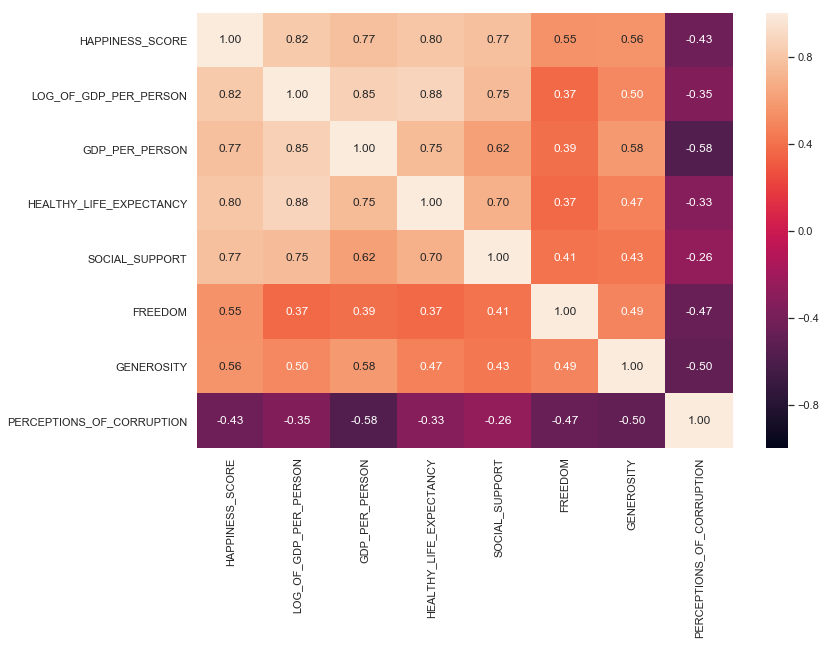

In [24]:
# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(12, 8))
sb.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

# 1. What are the top factors which affect happiness? Are there any wrong perceived factors about happiness?

In [25]:
# Dataframe of the Happiness Score
happiness_score = pd.DataFrame(data["HAPPINESS_SCORE"])
happiness_score.describe().round(2)

,HAPPINESS_SCORE
count,142.00
mean,5.35
std,1.14
min,2.90
25%,4.43
50%,5.33
75%,6.16
max,7.63


### Uni-variate plot of Happiness Score variable

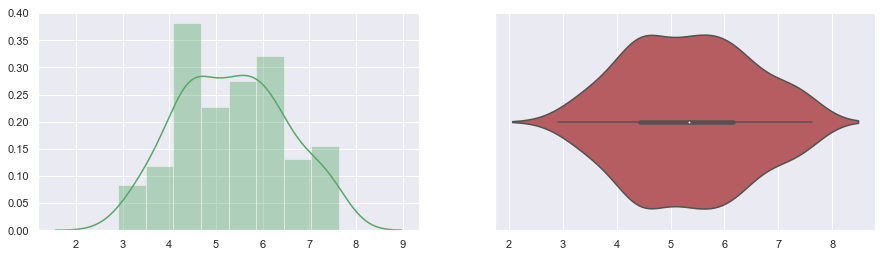

In [26]:
f,axes = plt.subplots(1,2,figsize=(15,4))
sb.distplot(happiness_score,kde=True,hist=True,color="g",ax=axes[0])
sb.violinplot(happiness_score,ax=axes[1],color="r")

## Let us classify the Happiness Score into `3 Categories` with the help of the Univariate Plots:
 #### 1. Unhappy (less than 4)
 #### 2. Normal / Likely Happy (between 4 and 6)
 #### 3. Happy (more than 6)
 
![Categoies of Happiness](images/Happiness_Categories.png)


### Categortising the happiness of each country using our Happiness Categorisation

In [27]:
# Add our Happiness Category into the Happiness_Score dataframe
happiness=[]
for i in happiness_score["HAPPINESS_SCORE"]:
    if i<4:
        happiness.append("UNHAPPY")
    elif 4<=i<=6:
        happiness.append("NORMAL")
    else:
        happiness.append("HAPPY")

# Join our Hapiness_Score dataframe into the main dataframe
pred_happiness = pd.DataFrame(happiness,columns=["PREDICTED_HAPPINESS"])
pred_happiness = pd.DataFrame(pred_happiness["PREDICTED_HAPPINESS"].astype('category'))
data = pd.concat([data,pred_happiness],axis=1)

In [28]:
# Remove any duplicate columns (if any)
data = data.loc[:,~data.columns.duplicated()]
data.head()

,COUNTRY,HAPPINESS_SCORE,LOG_OF_GDP_PER_PERSON,GDP_PER_PERSON,HEALTHY_LIFE_EXPECTANCY,SOCIAL_SUPPORT,FREEDOM,GENEROSITY,PERCEPTIONS_OF_CORRUPTION,PREDICTED_HAPPINESS
0,Afghanistan,3.632,7.462610,1741.687500,52.013329,0.525075,0.445294,0.179054,0.879705,UNHAPPY
1,Albania,4.586,9.338126,11363.095700,68.871552,0.639576,0.726340,0.259975,0.886778,NORMAL
2,Algeria,5.295,9.540703,13914.723630,65.604858,0.776977,0.439177,0.128988,0.698343,NORMAL
3,Angola,3.795,8.741957,6260.132813,52.460709,0.765275,0.374173,0.106829,0.833540,UNHAPPY
4,Argentina,6.388,9.842001,18807.310550,67.398483,0.905565,0.853390,0.163174,0.847882,HAPPY


### Count of Happiness based on our categorisation

In [29]:
data["PREDICTED_HAPPINESS"].value_counts()

NORMAL     85
HAPPY      40
UNHAPPY    17
Name: PREDICTED_HAPPINESS, dtype: int64

---
Visualising our Happiness Categorisation
---
We can see that majority of the countries are neither Happy nor Unhappy, hence they fall under the `Normal` Category

Text(0,0.5,'Number of Countries')

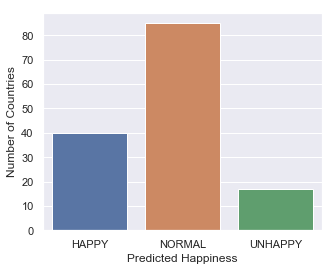

In [30]:
f, axes = plt.subplots(1, 1, figsize=(5, 4))
sb.countplot(data["PREDICTED_HAPPINESS"])
plt.xlabel("Predicted Happiness")
plt.ylabel("Number of Countries")

### Distribution of all variables on different Happiness Categories

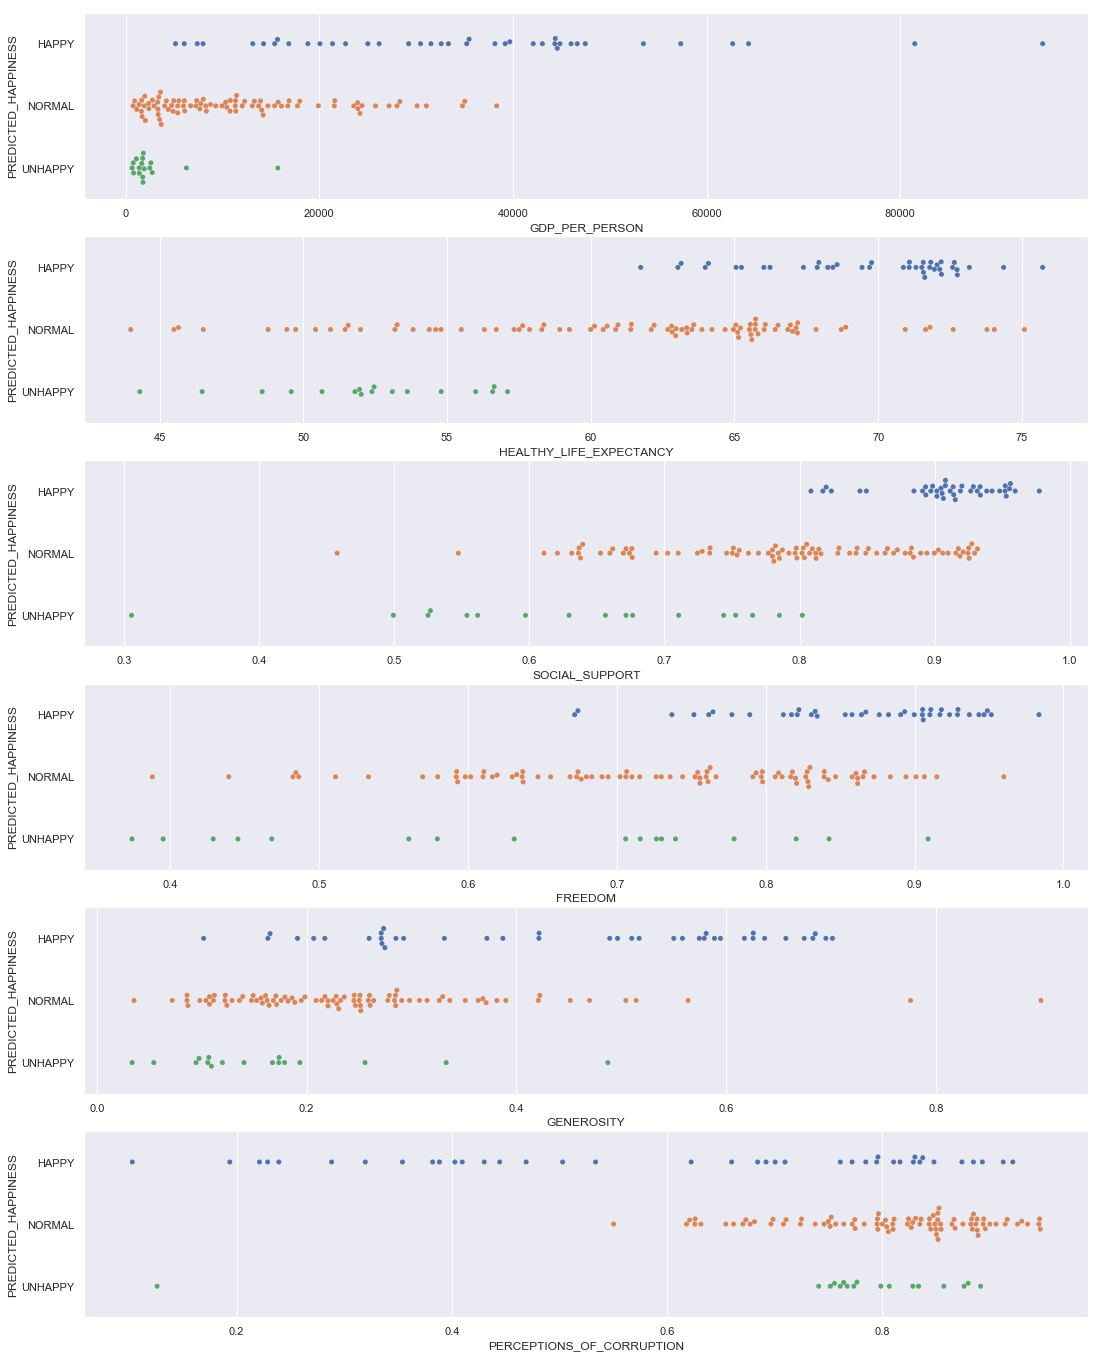

In [31]:
# Swarm plot for all the variables
predictors=["GDP_PER_PERSON","HEALTHY_LIFE_EXPECTANCY","SOCIAL_SUPPORT","FREEDOM","GENEROSITY","PERCEPTIONS_OF_CORRUPTION"]
f,axes=plt.subplots(6,1,figsize=(18,24))
count=0
for var in predictors:
    sb.swarmplot(x=var,y="PREDICTED_HAPPINESS",data=data,orient="h",ax=axes[count])
    count+=1

## `Observation 1:`  
## Order of Importance of Variables to predict Happiness

1. GDP
2. Life Expectancy
3. Social Support
4. Generosity
5. Corruption
6. Freedom of Life  

###  (1 - Most Important, 7 - Least Important)

## `Observation 2:`
## Perceptions about Happiness
---
The Swarm plot is the most difficult to categorise. Also the same observation can be seen in the heat-map (drawn above) in Exploratory Data Analysis / Visualization that Perception of Corruption has a low co-relation with the Happinesss Score.
  
Corruption is often seen as an important factor for a country's growth and economy, however, from the order of variables stated above, we can infer that, counter-intuitively, Corruption matters the least at an individual level to citizens of a Country as a factor to their happiness. 

# 2. Create your own Country! 

<img src="images/tree_border.png"
     style="float: left"/>

## Training the dataset using `Random Forest` Classifier algorithm to predict Happiness Category

In [35]:
# Recall the World Happiness Dataset
predictors=["GDP_PER_PERSON","HEALTHY_LIFE_EXPECTANCY","SOCIAL_SUPPORT","GENEROSITY"]
x=pd.DataFrame(data[predictors])
y=pd.DataFrame(data["PREDICTED_HAPPINESS"])

# Split the Dataset into Train and Test with a test size of 0.25
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state = 42)

# Create Random Forest Classifier
forest = RandomForestClassifier(n_estimators = 80, random_state = 42, max_depth = 10, min_samples_split = 0.1, min_samples_leaf = 0.001)
forest.fit(x_train,y_train)

# Predict Happiness using Random Forest Classifier
y_train_pred_forest=forest.predict(x_train)
y_test_pred_forest=forest.predict(x_test)

# Check the Goodness of Fit (by Random Forest Classifier)
print("Goodness of fit by using Random Forest Classifier:")
print("\tThe prediction accuracy on Train set: ",round(forest.score(x_train,y_train),2))
print("\tThe prediction accuracy on Test set: ",round(forest.score(x_test,y_test), 2))
print()

Goodness of fit by using Random Forest Classifier:
	The prediction accuracy on Train set:  0.9
	The prediction accuracy on Test set:  0.72



D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



---
As observed from the values of Goodness of fit, we can say that the Random Forest Classifier algorithm is very powerful. We can get an accuracy of upto 75% on the test data. 

## Training the dataset using `Linear Regression` algorithm to predict the most similar Country

In [36]:
# Prepare X_train, X_test, y_train, y_test
X = data[["LOG_OF_GDP_PER_PERSON", "HEALTHY_LIFE_EXPECTANCY", "SOCIAL_SUPPORT", "GENEROSITY"]]
y = data["HAPPINESS_SCORE"]
scaler = StandardScaler()
scaler.fit(X)
X_standard = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.2, random_state=10)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print("Training set R^2:", linreg.score(X_train, y_train))
print("Test set R^2:", linreg.score(X_test, y_test))

Training set R^2: 0.7720513073696834
Test set R^2: 0.738411905582668


---
As observed from the values of R^2, the Linear Regression Algorithm is working well with an accuracy of 75% on the test data. 

## Create your own Country! 
### 1. Predict the Happiness Category of your Country
### 2. Predict the most similar Country as yours

In [37]:
print()

name = input("Enter your Country Name: ")

print("--------------------------------")

print("Let us analyse the feasabiliy [Happiness Category/Score] of", name, "by entering some important features: ")

print()
print("--------------------------------")
print()

print("Reference: Average GDP Per Capita of all Countries: USD 17000, Singapore's GDP Per Capita: USD 81000")
while True:
    try:
        gdp = float(input("Enter the Average GDP Per Capita for your Country (in USD): "))
        break
    except ValueError:
        print("Please enter a valid input.")
        print()

print()
print("--------------------------------")
print()

while True:
    try:
        life_expectancy = float(input("Enter the Average Life Expectancy of your Citizens: (Age) "))
        break
    except ValueError:
        print("Please enter a valid input.")
        print()

print()
print("--------------------------------")
print()

print("Reference Question: Social Support - If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?")

while True:
    try:
        social_support=float(input("Enter the Social Support Index (Choose between 0 and 1, 0 - Lowest : 1 - Highest): "))
        break
    except ValueError:
        print("Please enter a valid input.")
        print()

print()
print("--------------------------------")
print()

print("Reference Question: Generosity - Have you donated money to a charity in the past month?")

while True:
    try:
        generosity =float(input("How generous are people in your Country? (Choose between 0 and 1, 0 - Lowest : 1 - Highest): "))
        break
    except ValueError:
        print("Please enter a valid input.")
        print()

print()
print("--------------------------------")
print()

# Create a new dataframe for user input data
new_country = {"GDP_PER_PERSON": [gdp] ,"HEALTHY_LIFE_EXPECTANCY": [life_expectancy] ,"SOCIAL_SUPPORT": [social_support] \
              ,"GENEROSITY": [generosity]}
new_country = pd.DataFrame(new_country)

# Predict happiness category using user input data
y_prob = forest.predict_proba(new_country)

# Extract different probabilites into variables
y_prob1 = pd.DataFrame(list(y_prob[:,0])[0],columns=["Probability Happy"],index=new_country.index)
y_prob2 = pd.DataFrame(list(y_prob[:,1])[0],columns=["Probability Normal"],index=new_country.index)
y_prob3 = pd.DataFrame(list(y_prob[:,2])[0],columns=["Probability Unhappy"],index=new_country.index)


# Create a dataframe with predicted probabilities
data_comb = pd.concat([new_country, y_prob1, y_prob2, y_prob3], axis=1)

# Extract the probabilities
happy = list(y_prob[:,0])[0]
normal = list(y_prob[:,1])[0]
unhappy = list(y_prob[:,2])[0]

print()


def find_nearest_country(gdp, hle, scl):
    def calculate_distance(x, gdp, hle, scl):
        gdp_dif = np.log((x["LOG_OF_GDP_PER_PERSON"] - gdp)**2)
        hle_dif = np.log((x["HEALTHY_LIFE_EXPECTANCY"] - hle)**2)
        scl_dif = np.log((x["SOCIAL_SUPPORT"] - scl)**2)
        return gdp_dif + hle_dif + scl_dif
    
    # Extract necessary data to work with graphs and training model
    data1 = data[["COUNTRY", "LOG_OF_GDP_PER_PERSON", "HEALTHY_LIFE_EXPECTANCY","SOCIAL_SUPPORT"]]
    data1['distances'] = data1.apply(lambda x: calculate_distance(x, gdp, hle, scl), axis=1)
    index = data1['distances'].values.argmin()
    found = data1.iloc[index, :]
    min_distance = data1['distances'].min()
    
    
    # plot the graph to see how it is different to our data
    # whole data
    text1 = data[['COUNTRY','GDP_PER_PERSON']].apply(lambda x: "{}, {:.3f}".format(x[0], x[1]), axis=1)
    trace0 = go.Scatter(
        x = data1['SOCIAL_SUPPORT'],
        y = data1['HEALTHY_LIFE_EXPECTANCY'],
        text = text1,
        mode='markers',
        marker=dict(
            size = data['GDP_PER_PERSON'].apply(lambda x: x**0.4)
        ),
        showlegend=False
    )
    # Your country
    trace1 = go.Scatter(
        x = [scl],
        y = [hle],
        text = "Your country",
        mode = 'markers',
        marker = dict (
            size = [gdp**0.4],
            color='rgb(255,0,0)'
        ),
        showlegend=False
    )
    graph = [trace0, trace1]
    py.iplot(graph, filename='abc')
    
    return found, min_distance

def program():
  #  gdp = -999       # GDP_PER_PERSON
    hle = life_expectancy       # HEALTHY_LIFE_EXPECTANCY
    scl = social_support       # SOCIAL_SUPPORT
    choice = 0

    # Find country on the plot
    found_data, min_distance = find_nearest_country(gdp, hle, scl)
    if min_distance >= 30:
        print(min_distance)
        print("Your inputs seem a little bit strange. You may want to change them.")
    else:
        print()
        print("--------------------------------")
        print()
        print("{} is the country that has the most similar features to yours".format(found_data[0]))
        print()
        print("--------------------------------")
        print()


# Select the highest probability
if (normal > happy and normal > unhappy):
    print("Your Country can be better! We can say that the citizens of", name, \
          "will be LIKELY HAPPY / NORMAL with a probability of", round(normal*100, 2), "%")
elif (happy > normal and happy > unhappy):
    print("Congrats! We can say that the citizens of", name, "will be HAPPY with a probability of", round(happy*100, 2), "%")
else:
    print("Oh No! We can say that the citizens of", name, "will be UNHAPPY with a probability of", round(unhappy*100, 2), "%")
    
print()
print("--------------------------------")
print()

program()


Enter your Country Name: abc
--------------------------------
Let us analyse the feasabiliy [Happiness Category/Score] of abc by entering some important features: 

--------------------------------

Reference: Average GDP Per Capita of all Countries: USD 17000, Singapore's GDP Per Capita: USD 81000
Enter the Average GDP Per Capita for your Country (in USD): 10000

--------------------------------

Enter the Average Life Expectancy of your Citizens: (Age) 70

--------------------------------

Reference Question: Social Support - If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?
Enter the Social Support Index (Choose between 0 and 1, 0 - Lowest : 1 - Highest): 1

--------------------------------

Reference Question: Generosity - Have you donated money to a charity in the past month?
How generous are people in your Country? (Choose between 0 and 1, 0 - Lowest : 1 - Highest): 1

--------------------------------


Congrats

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:99: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy




--------------------------------

United States is the country that has the most similar features to yours

--------------------------------



<img src="images/singapore.png"
     style="float: left"/>

# 3. Economic Analysis of Singapore
#### Importing and Cleaning the Dataset

In [38]:
data = pd.read_excel('data/data.xls', sheet_name = 'Table2.1')

clean_data = data.copy()

# Rename the Country Column
clean_data.rename(columns = {'Country name': 'Country'}, inplace = True)

# Convert all Variable Names to UPPERCASE
clean_data.columns = clean_data.columns.str.upper()

# Remove all spaces and dots from Variable Names
clean_data.columns = clean_data.columns.str.replace(".","")
clean_data.columns = clean_data.columns.str.replace(" ","_")
clean_data.replace(' ', '_', regex=True)

clean_data.sample(n = 10)

# Set index of the dataframe to Country
clean_data = clean_data.set_index('COUNTRY')

# Select Singapore, United States and Canada 
clean_data = clean_data.loc[["Singapore", "United States", "Canada"]]

# Select the required variables
sg_data = clean_data[['YEAR', 'DEMOCRATIC_QUALITY', 'PERCEPTIONS_OF_CORRUPTION', 'LIFE_LADDER', 'SOCIAL_SUPPORT']]

# Removing NULL values
sg_data = sg_data[pd.notnull(sg_data['PERCEPTIONS_OF_CORRUPTION'])]
sg_data = sg_data[pd.notnull(sg_data['DEMOCRATIC_QUALITY'])]
sg_data = sg_data[pd.notnull(sg_data['SOCIAL_SUPPORT'])]

## Analysing Democracy in Singapore

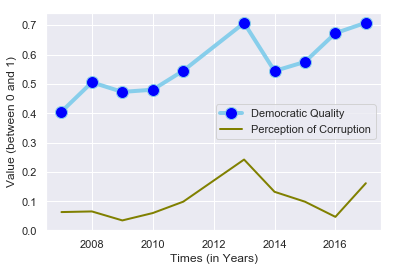

In [39]:
# multiple line plot
plt.plot( 'YEAR', 'DEMOCRATIC_QUALITY', data=sg_data.loc["Singapore"], marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label="Democratic Quality")
plt.plot( 'YEAR', 'PERCEPTIONS_OF_CORRUPTION', data=sg_data.loc["Singapore"], marker='', color='olive', linewidth=2, label="Perception of Corruption")
plt.xlabel("Times (in Years)")
plt.ylabel("Value (between 0 and 1)")
plt.legend()

## `Observation 1`

### Corruption in Singapore is generally perceived as low. However, a few minor scandals led to an sharp dip in Democratic Quality of Singapore.

**SCDF and CNB (2012)** - In January 2012, two senior civil servants were arrested under graft charges. Both men were arrested in connection with the Prevention of Corruption Act relating to an IT contract

**NParks (2012)** - In July 2012, National Parks Board's (NParks) purchase of 26 Brompton bikes costing $2,200 each sparked a nationwide uproar after it was revealed by a whistleblower on online forum HardwareZone of possible corruption due numerous red flags in the way the procurement was done.

**CPIB (2013)** - On 23 July 2013, Corrupt Practices Investigation Bureau (CPIB) assistant director Edwin Yeo Seow Hionh was charged with misappropriating at least $1.7 million from the anti-graft agency between 2008 and 2012.

**MFA (2014)** -  On 20 February 2014, former Ministry of Foreign Affairs (MFA) protocol chief Lim Cheng Hoe, 61, was sentenced to 15 months' jail for cheating.

## `Observation 2`
---
We can see a sharp increase in the `Perception of Corruption` index between the years 2010 and 2013. Furthermore, a decrease in the `Democatic Quality` can be seen from 2013 to 2014. We can infer from the following observations that an increase in the Perception of Corruption led to a decrease in the Democratic Quality in the subsequent years.
  
Morever, we may also infer that no matter how good the democracy of a country is, it still leads to some form of corruption. 

## Social Support in Singapore

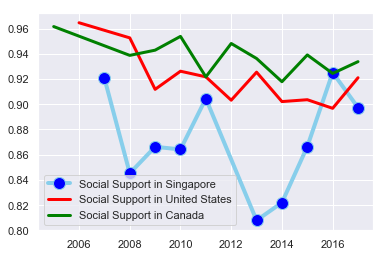

In [40]:
# multiple line plot
plt.plot( 'YEAR', 'SOCIAL_SUPPORT', data=sg_data.loc["Singapore"], marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label="Social Support in Singapore")
plt.plot( 'YEAR', 'SOCIAL_SUPPORT', data=sg_data.loc["United States"], color='red', linewidth=3, label="Social Support in United States")
plt.plot( 'YEAR', 'SOCIAL_SUPPORT', data=sg_data.loc["Canada"], color='green', linewidth=3, label="Social Support in Canada")
plt.legend()

---
**Maintaining social harmony is very much at the top of the Singapore's government priority**


There are three aspects of this issue:  
* Income Inequality,
* Social Mobility, and
* Social Integration.

All these aspects are inter-related. 

The government has provided schemes and subsidies to lower-income groups. For example, the Workfare Income Supplement Scheme tops up their cash earnings and Central Provident Fund accounts, and helps them build up their retirement savings.

Due to these policies, we can see an increase in Social Support of Singapore from 2013 onwards. 

## Life Satisfaction over the years in Singapore

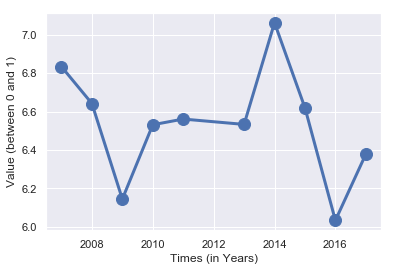

In [41]:
plt.plot('YEAR', 'LIFE_LADDER', data=sg_data.loc['Singapore'], linestyle='-', marker='o', linewidth=3, markersize=12)
plt.xlabel("Times (in Years)")
plt.ylabel("Value (between 0 and 1)")
plt.show()